In [2]:
import numpy as np
import pandas as pd


In [3]:
import cv2
import matplotlib.pyplot as plt

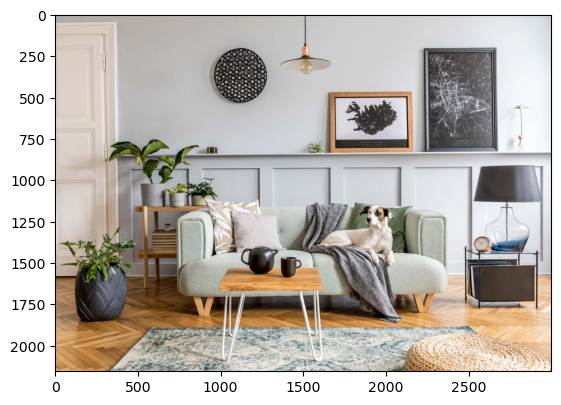

In [4]:
img = plt.imread("CLIP.jpg")
plt.imshow(img)


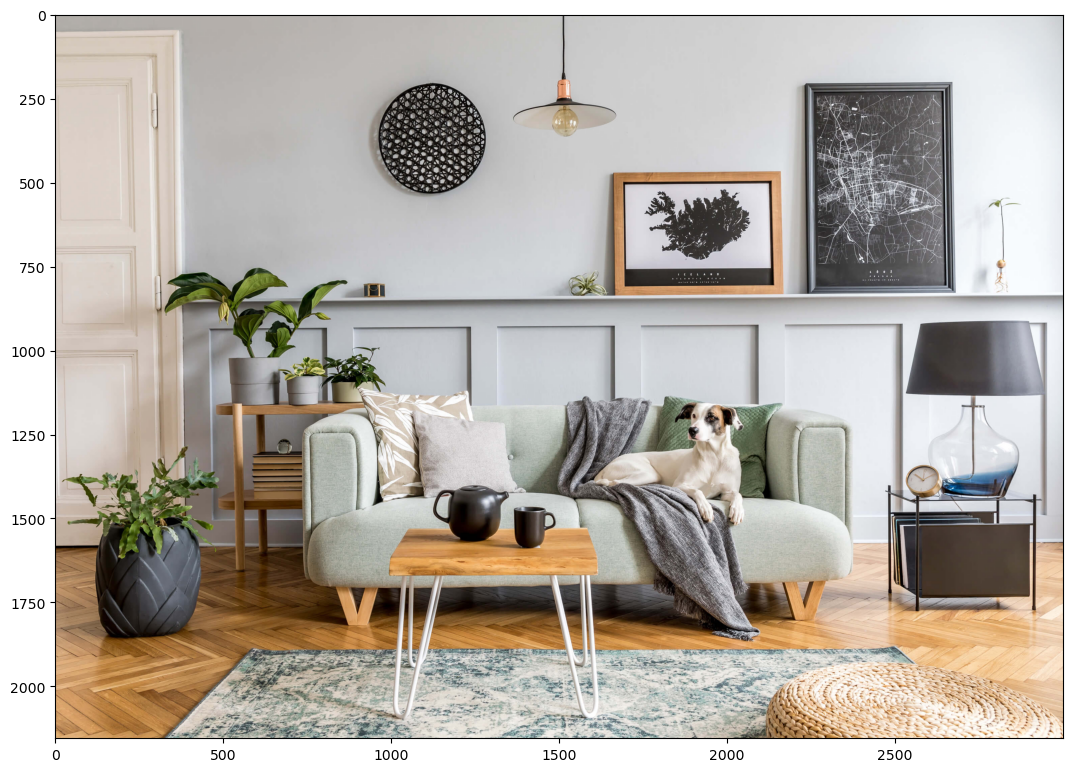

In [5]:
img = cv2.imread("CLIP.jpg")
img=cv2.cvtColor(img ,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(13,10))
plt.imshow(img)

In [6]:
img.shape

(2155, 3000, 3)

In [7]:
# Assuming img is your input image (check its shape)
height, width, _ = img.shape  # Should be (height, width, 3) for RGB

# Create pixel coordinate arrays
x_pixel, y_pixel = np.indices((height, width))

# Flatten the coordinate arrays
x_pixel_flat = x_pixel.ravel()
y_pixel_flat = y_pixel.ravel()

print(x_pixel_flat.shape)
print(y_pixel_flat.shape)

vectorized_img = img.reshape((-1,3))

vectorized_img= np.float32(vectorized_img)
vectorized_img.shape



(6465000,)
(6465000,)


(6465000, 3)

In [8]:
# stack/concate the arrays
array_cordinate_rgb = np.column_stack((x_pixel_flat, y_pixel_flat, vectorized_img))
print(array_cordinate_rgb.shape)  # Should be (height * width, 5]





(6465000, 5)


In [13]:

# Apply DBSCAN clustering
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=10 ,min_samples=200, metric='euclidean')
db.fit(array_cordinate_rgb)

# Get the cluster labels
labels = db.labels_

# Reshape the labels back into the shape of the original image
segmented_image = labels.reshape(height, width)

# Print the unique labels from DBSCAN (including noise labeled as -1)
print(f"Unique labels in DBSCAN: {np.unique(labels)}")


Unique labels in DBSCAN: [ -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106
 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124
 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178
 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196
 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214
 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232
 233 234 235 236 237 238 2

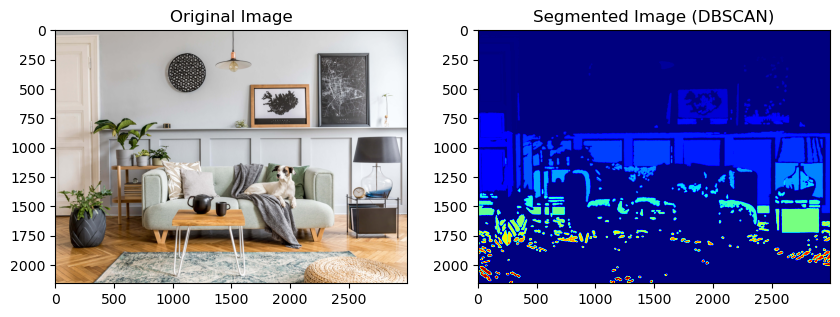

In [14]:
# Plot the original and segmented image
plt.figure(figsize=(10, 5))

# Display the original image on the left
plt.subplot(1, 2, 1)
plt.imshow(img)  # Show the downsampled RGB image
plt.title('Original Image')

# Display the segmented image on the right (using a colormap to visualize clusters)
plt.subplot(1, 2, 2)
plt.imshow(segmented_image, cmap='jet')  # Use 'jet' colormap to visualize clusters
plt.title('Segmented Image (DBSCAN)')

# Show the plot
plt.show()

In [ ]:
# Randomly select a subset of points (e.g., 10% of the total points)
subsample_size = int(0.05 * len(array_cordinate_rgb))  # 5% of the data
random_indices = np.random.choice(len(array_cordinate_rgb), subsample_size, replace=False)

# Subset the data for Silhouette computation
subset_data = array_cordinate_rgb[random_indices]
subset_labels = labels[random_indices]

# Compute Silhouette Score on the subset
silhouette_avg = silhouette_score(subset_data, subset_labels)
print(f"Silhouette Score (subsample): {silhouette_avg}")

In [ ]:
# Faranak Bakhtiari